## MSDS 432 - Programming Assignment #6 Dan Avni

## Executive Summary

The purpose of this programming assignment is to provide a "real-world" demonstration of the runtime performance of the breadth-first-search (BFS) algorithm. BFS is a long standing key algorithm in the study of graph and tree search and traversal, with applications ranging from network community detection to shortest distance search. 

BFS search strategy is to traverse the tree or graph level by level, by queuing nodes in a first-in-first-out data structure.  

BFS worst-case runtime performance in the $Big O$ notation is $O(|V| + |E|)$ with $|V|$ representing the number of vertices in the graph and $|E|$ representing the number of edges. 

We demonstrate that BFS runtime performance increases the deeper the searched item resides in the tree. Hence, for use cases where the deeper nested items are commonly searched, an alternative method such as depth-first-search (DFS) should be considered.


## Method and Conclusions

To demonstrate the various sort algorithm average-case performance, we prepared 1000 data elements consisting of a tuple of first name, last name, and state code selected randomly with no repetition or order.

We sort the data 25 times using each of the four algorithms and measure the mean runtime performance. We show the results in both tabular and bar chart for and confirm the therotical results. 

We repeat the excercise with the data sorted in descending order to demonstrate the worst-case performance of quicksort and mergesort.

The below chart shows the avergae case results.

<img src="./runtime5.png">

## Implementation

In [90]:
#import required packages
from collections import deque
import pandas as pd
import time
import matplotlib.pyplot as plt

In [91]:
#breadth-first-search (bfs) implementation adapted and heavily modified from: 
#https://github.com/egonSchiele/grokking_algorithms/

def breadth_first_search(tree, item):
    search_queue = deque(['__root__'])
    # This set is how you keep track of which items you've searched before.
    searched = set()
    while search_queue:
        cur_item = search_queue.popleft()
        # Only search this item if you haven't already searched them.
        if cur_item not in searched:
            if cur_item == item:
                return True
            else:
                for child in tree[cur_item]:
                    search_queue.append(child)
                # Marks this item as searched
                searched.add(cur_item)
    return False

In [92]:
#unit test
tree = {}
tree['__root__'] = ["danny"]
tree["danny"] = ["alice", "bob", "claire"]
tree["bob"] = ["anuj", "peggy"]
tree["alice"] = ["peggy"]
tree["claire"] = ["thom", "jonny"]
tree["anuj"] = []
tree["peggy"] = []
tree["thom"] = []
tree["jonny"] = []

breadth_first_search(tree, "peggy")

True

In [93]:
#prepare data
def add_tree_children(tree, item, count, level):
    if level == 6:
        return
    
    tree[item] = []
    
    for child in range(1, count+1):
        child_item = '{}{}{}'.format(item if item != "__root__" else "", level+1, child)
        tree[item].append(child_item)
        add_tree_children(tree, child_item, count, level+1)

tree = {}

add_tree_children(tree, '__root__', 5, 0)

In [94]:
search_levels = [1, 2, 3, 4, 5]

test_results_col_names = ['search_level', 'search_item', 'search_ms']
test_results           = pd.DataFrame(columns = test_results_col_names) 

search_prefix = ['1{}', '112{}', '11213{}', '1121314{}','112131415{}']

for level in range(1,6):
    for count in range(1,level+1):
            search_item = search_prefix[level-1].format(count)
            start   = time.time()
            found = breadth_first_search(tree, search_item)
            if found == False:
                raise Exception("item not found")
            search_ms = (time.time() - start) * 1000
            #insert the results into a new dataframe record 
            test_results.loc[len(test_results)] = [level, search_item, search_ms]

In [95]:
test_results

,search_level,search_item,search_ms
0,1,11,0.012398
1,2,1121,0.016689
2,2,1122,0.016212
3,3,112131,0.067949
4,3,112132,0.045300
5,3,112133,0.153303
6,4,11213141,0.255585
7,4,11213142,0.238895
8,4,11213143,0.230789
9,4,11213144,0.247002


In [96]:
test_results_mean = test_results.groupby(['search_level'], as_index=False)['search_ms'].mean()

Below is a tabular representation of the test data. It is useful as the charts fail to show the minute fluctuations in the binary search performance. To get a true read of the binary search performance we will need to run multiple tests and average the results, as well as increase the size. We should also try to execute the code in a virtualized environment where the CPU is under competition from other processes.

In [97]:
test_results_mean

,search_level,search_ms
0,1,0.012398
1,2,0.016451
2,3,0.088851
3,4,0.243068
4,5,0.987720


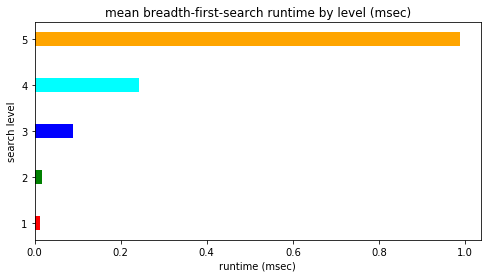

In [98]:
#plot the binary and linear search results against the data length
plt.figure(figsize=(8,4))
plt.barh(test_results_mean.search_level, test_results_mean.search_ms, height=0.3, 
         color=['red', 'green', 'blue', 'cyan','orange'])
plt.ylabel('search level')
plt.xlabel('runtime (msec)')
plt.title('mean breadth-first-search runtime by level (msec)')
plt.show()